<a href="https://colab.research.google.com/github/gokturkberke/tensorflow-deeplearning/blob/main/neural_network_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A classification is where you try to classify something as one thing or another

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples =1000

#create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
#Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1" :X[:,1],"label":y})

In [ ]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


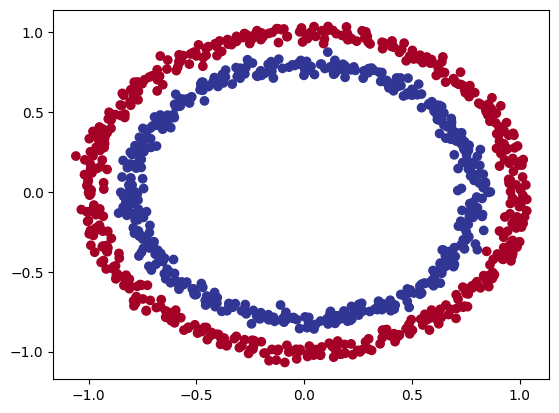

In [ ]:
#lets visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);
#c=y: Her noktanın rengi y değişkenine göre belirleniyor

### Input and Output shapes

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
X[0],y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

### Steps in modelling

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

#lets create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics= ["accuracy"])

#fit the model
model_1.fit(X,y,epochs=5)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4911 - loss: 4.7188   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4895 - loss: 4.1091 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5124 - loss: 0.8149
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 0.7127
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5154 - loss: 0.6968


In [ ]:
#improve the model
model_1.fit(X,y,epochs=200,verbose=0)

In [ ]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around %50 accuracy...
So lets step things up. a notch and add and extra layer

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_2.evaluate(X,y) #we are evaluating the same data for now (train test we need to do)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3998 - loss: 0.6927  


[0.6933032274246216, 0.41100001335144043]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5103 - loss: 0.6916  


[0.6944066882133484, 0.49300000071525574]

In [ ]:
model_3.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.5178924 ],
       [0.47177243],
       [0.47044936],
       [0.49379265],
       [0.48497814],
       [0.49091682],
       [0.50730747],
       [0.51664007],
       [0.4691429 ],
       [0.50872004],
       [0.46045408],
       [0.5253487 ],
       [0.50483257],
       [0.50542474],
       [0.49615172],
       [0.4803619 ],
       [0.45600346],
       [0.4772889 ],
       [0.46456438],
       [0.4562328 ],
       [0.51873684],
       [0.4922124 ],
       [0.4692372 ],
       [0.51845217],
       [0.47366324],
       [0.4674188 ],
       [0.51985836],
       [0.51191974],
       [0.48206413],
       [0.50040805],
       [0.46253198],
       [0.50510204],
       [0.5075427 ],
       [0.5206719 ],
       [0.4657241 ],
       [0.48204744],
       [0.4860842 ],
       [0.5190087 ],
       [0.4829119 ],
       [0.5262358 ],
       [0.4569555 ],
       [0.5211843 ],
       [0.45549977],
       [0.51029897],
       [0.45402735],
       [0.45662722],
       [0.48997533],
       [0.514

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 #eksen sinirlari belirledik
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), #100 esit parcaya bol
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions using the trained model
  y_pred = model.predict(x_in) #Model her grid noktası için tahmin yapar

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape) #Her satır için en yüksek olasılığın index'ini bulur ondan sonra (10000,) olan diziyi (100, 100) şekline çevirir
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape) #her satirdaki max degeri alir zaten(1 tane var binaryde ama olsun) sonra 0.5ten buuykse 1 degilse 0

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


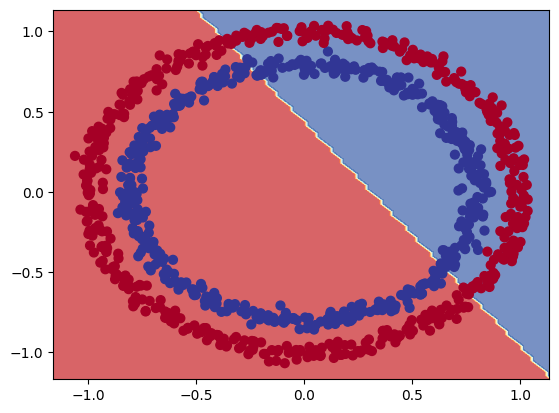

In [ ]:
#check out the predciton
plot_decision_boundary(model=model_3,X=X,y=y)

In [ ]:
x_min,x_max= X[:,0].min() - 0.1,X[:,0].max() + 0.1
y_min,y_max = X[:,1].min() - 0.1,X[:,1].max() + 0.1

x_min,x_max,y

(np.float64(-1.1595024599098636),
 np.float64(1.1337117525463374),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

#split data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 376.0677 - mae: 376.0677
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 267.9536 - mae: 267.9536 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 157.0932 - mae: 157.0932
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 54.5837 - mae: 54.5837 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 72.0518 - mae: 72.0518 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 75.1570 - mae: 75.1570
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 49.5672 - mae: 49.5672
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 45.8878 - mae: 45.8878
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 42.8905 - mae: 42.8905
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 42.9079 - mae: 42.9079 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 43.5225 - mae: 43.5225 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.2922 - mae: 40.2922
Epoch 13/100
5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


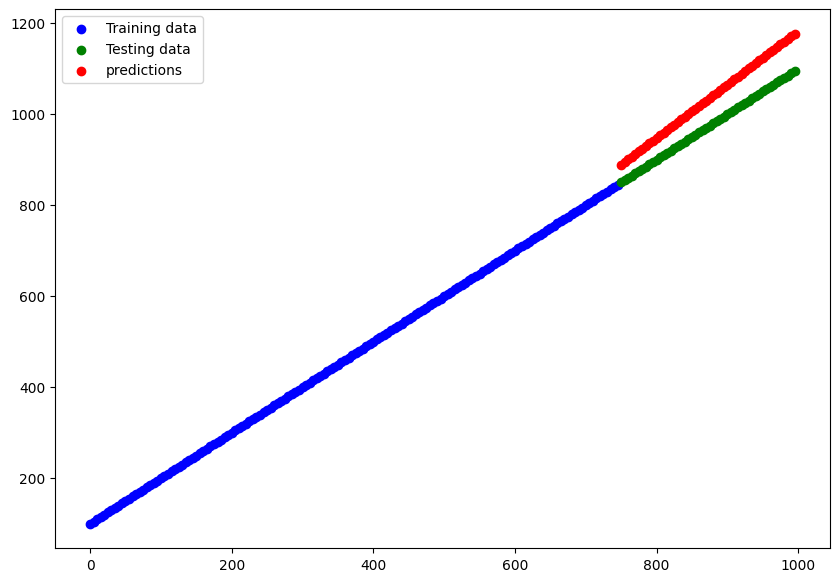

In [ ]:
#Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

#plot the model predictinos
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Testing data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="predictions")
plt.legend();

In [ ]:
#NON-linearity

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4615 - loss: 6.6838
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4601 - loss: 6.6427
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4604 - loss: 6.6309
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4616 - loss: 6.6213
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4577 - loss: 6.5321
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4575 - loss: 6.4986
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4502 - loss: 6.4289
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4509 - loss: 6.4274
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4509 - loss: 6.4142
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4509 - loss: 6.3547
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4509 - loss: 6.3462
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

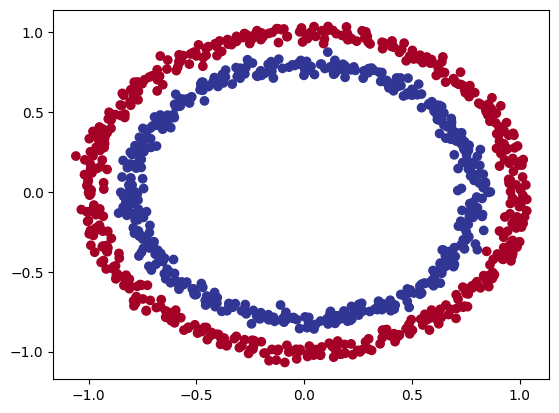

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


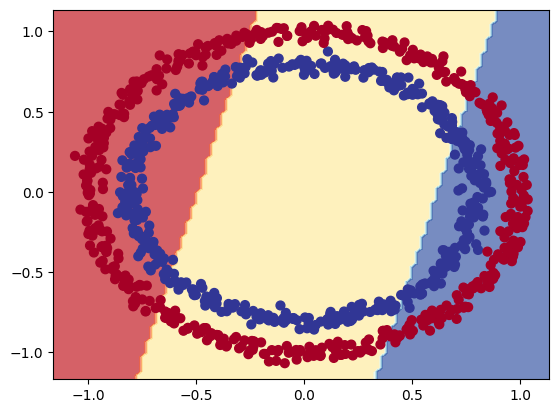

In [ ]:
#Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X,y=y)

In [ ]:
#Lets try build or first neural network with non linear function

tf.random.set_seed(42)

#non linear activation anything except linear
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5127 - loss: 6.1639
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5138 - loss: 6.1561 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5136 - loss: 6.0950
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5136 - loss: 6.0492
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5126 - loss: 6.0355
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5117 - loss: 6.0169
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5117 - loss: 5.9877
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5117 - loss: 5.9985
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5142 - loss: 5.9617
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5142 - loss: 5.9282
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5142 - loss: 5.9248
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [ ]:
#time to replicate multi layer neural network

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4830 - loss: 2.0849
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4830 - loss: 1.4603
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4830 - loss: 1.2870
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 1.1581
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 1.0589
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 0.9872
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 0.9276
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 0.8795
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 0.8407
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 0.8094
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 0.7839
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

In [ ]:
model_6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6867 - loss: 0.6036


[0.60011225938797, 0.6890000104904175]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


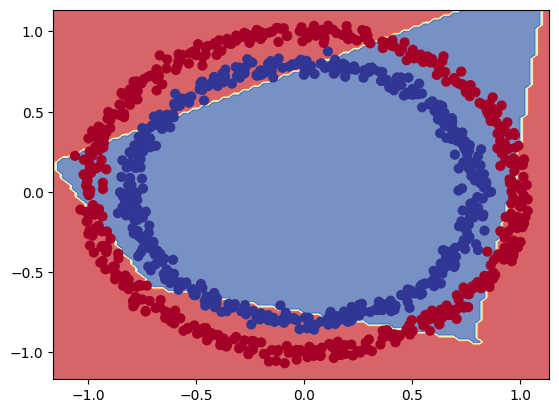

In [ ]:
plot_decision_boundary(model_6,X,y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4912 - loss: 0.6913
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5172 - loss: 0.6900
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5275 - loss: 0.6893
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5195 - loss: 0.6886
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5240 - loss: 0.6880
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5345 - loss: 0.6875
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5390 - loss: 0.6869
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5432 - loss: 0.6863
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5400 - loss: 0.6858
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5426 - loss: 0.6852
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5408 - loss: 0.6846
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7766 - loss: 0.5003


[0.500523567199707, 0.781000018119812]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
doing binary classifcation...


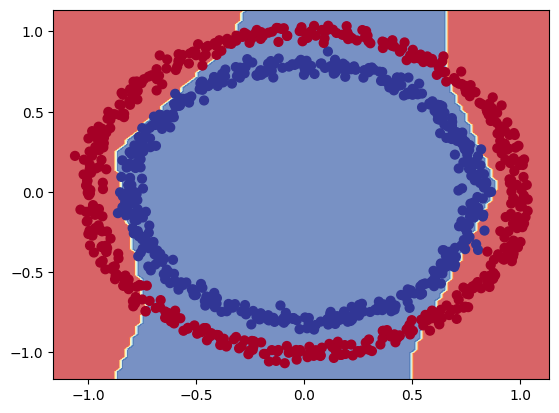

In [ ]:
#lets visualize

plot_decision_boundary(model_7,X,y)

In [ ]:
#Create a toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

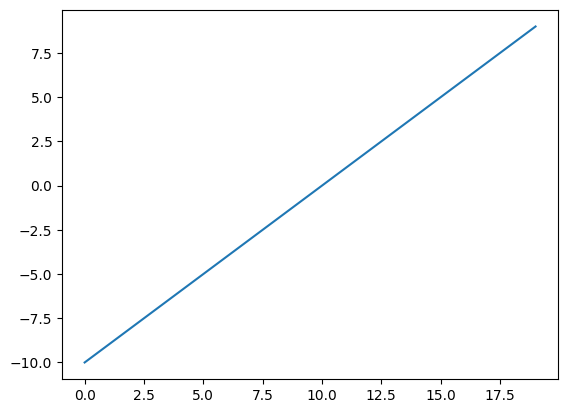

In [ ]:
plt.plot(A)

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

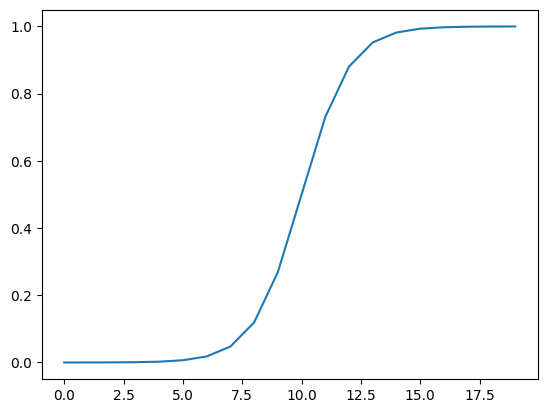

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  return tf.maximum(0,x)

#Pass our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

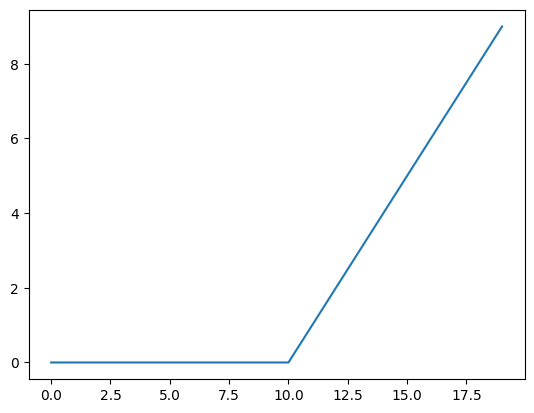

In [ ]:
plt.plot(relu(A))

In [ ]:
#Lets try the linear activation
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

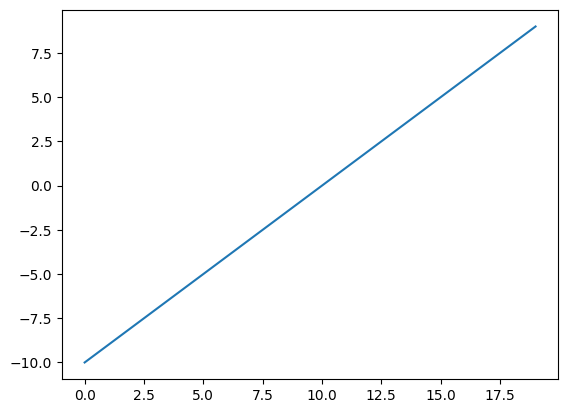

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [ ]:
len(X)

1000

In [ ]:
#Split into train and test sets
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

X_train.shape,y_train.shape

((800, 2), (800,))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation= "relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])
history = model_8.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4880 - loss: 0.6875
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5883 - loss: 0.6843
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5920 - loss: 0.6773 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5895 - loss: 0.6685
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6242 - loss: 0.6571 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7017 - loss: 0.6409
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7107 - loss: 0.6148 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.5878 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7570 - loss: 0.5542
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7836 - loss: 0.5259
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8019 - loss: 0.5009
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9678 - loss: 0.0857  


[0.06728614121675491, 0.9800000190734863]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


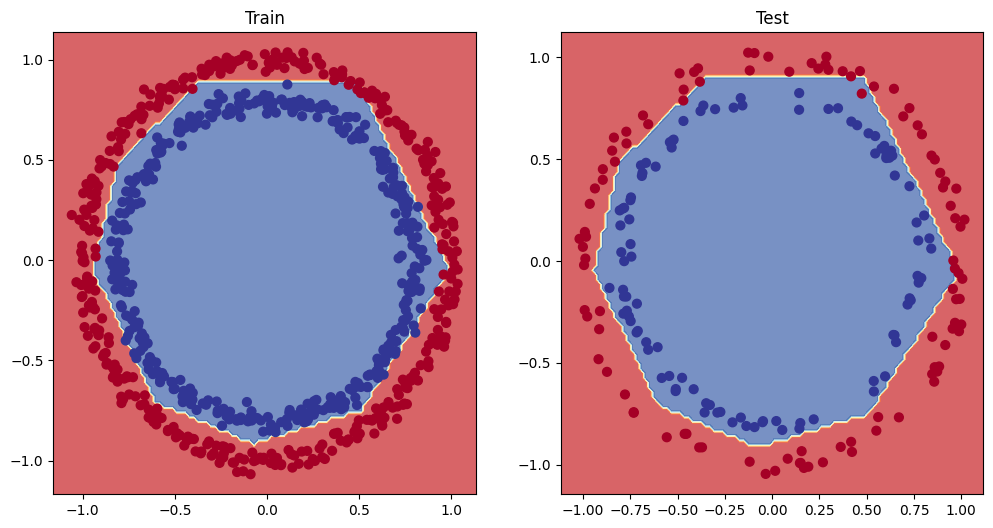

In [ ]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show();

# Plot the loss curves

In [ ]:
history.history

{'accuracy': [0.5024999976158142,
  0.5674999952316284,
  0.5762500166893005,
  0.6037499904632568,
  0.6412500143051147,
  0.7237499952316284,
  0.7437499761581421,
  0.7512500286102295,
  0.7699999809265137,
  0.7962499856948853,
  0.8125,
  0.8262500166893005,
  0.8324999809265137,
  0.8387500047683716,
  0.8475000262260437,
  0.8587499856948853,
  0.8612499833106995,
  0.8675000071525574,
  0.8675000071525574,
  0.8687499761581421,
  0.8787500262260437,
  0.8862500190734863,
  0.9312499761581421,
  0.9624999761581421,
  0.9775000214576721,
  0.981249988079071,
  0.981249988079071,
  0.9787499904632568,
  0.9825000166893005,
  0.981249988079071,
  0.9825000166893005,
  0.9825000166893005,
  0.9825000166893005,
  0.9825000166893005,
  0.9825000166893005,
  0.9825000166893005,
  0.9850000143051147,
  0.9837499856948853,
  0.9837499856948853,
  0.9825000166893005,
  0.9825000166893005,
  0.9825000166893005,
  0.981249988079071,
  0.981249988079071,
  0.9800000190734863,
  0.98000001907

In [ ]:
#Convert the history object into a DataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.50250,0.689697
1,0.56750,0.684860
2,0.57625,0.677237
3,0.60375,0.666077
4,0.64125,0.651549
5,0.72375,0.631640
6,0.74375,0.602296
7,0.75125,0.572303
8,0.77000,0.540283
9,0.79625,0.512555


Text(0.5, 1.0, 'Model_8 Loss curves')

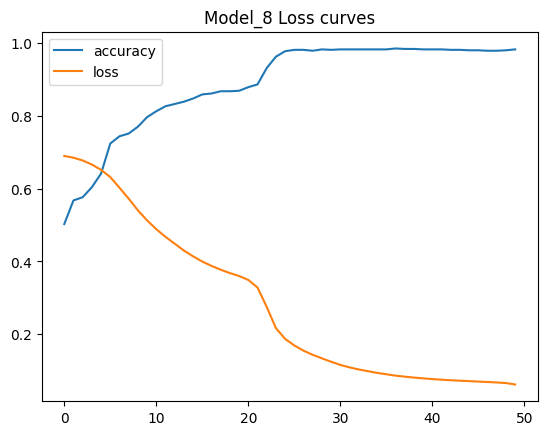

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss curves")

## Finding the best learning rate
The following steps to find
* A learning rate **callback**
* Another model
* A modified loss curves plot

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5038 - loss: 0.6896 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5077 - loss: 0.6895 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5080 - loss: 0.6895 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5097 - loss: 0.6894 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5097 - loss: 0.6894 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5114 - loss: 0.6893 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5133 - loss: 0.6893 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5127 - loss: 0.6892 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5146 - loss: 0.6891 - learning_

<Axes: xlabel='Epochs'>

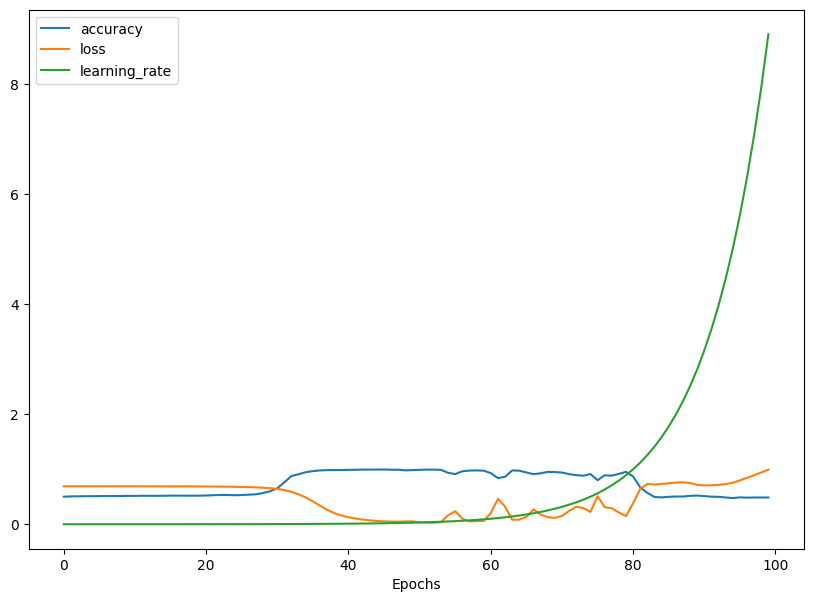

In [ ]:
#Checkout the history
pd.DataFrame(history_9.history).plot(figsize = (10,7),xlabel="Epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

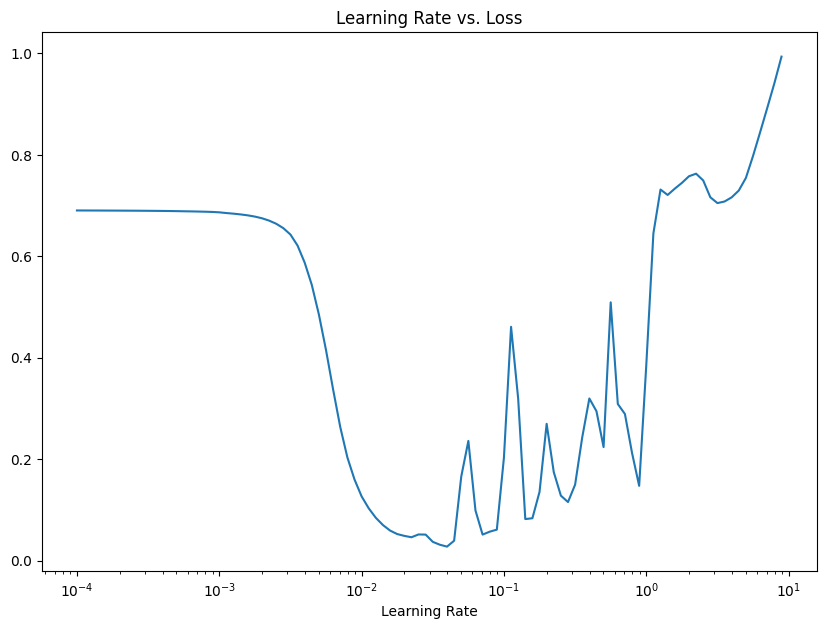

In [ ]:
#Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.title("Learning Rate vs. Loss")

In [ ]:
#Example of other typical learning rate values
10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train,y_train,epochs = 50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4678 - loss: 0.6968
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5509 - loss: 0.6846
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5324 - loss: 0.6719 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5819 - loss: 0.6543 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6704 - loss: 0.6257 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8066 - loss: 0.5586
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.5004 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.4473 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8488 - loss: 0.3981 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8669 - loss: 0.3687 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8700 - loss: 0.3487
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.88

In [ ]:
#Evaluate model 10
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9882 - loss: 0.0505  


[0.05505582317709923, 0.9850000143051147]

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9678 - loss: 0.0857 


[0.06728614121675491, 0.9800000190734863]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step
doing binary classifcation...


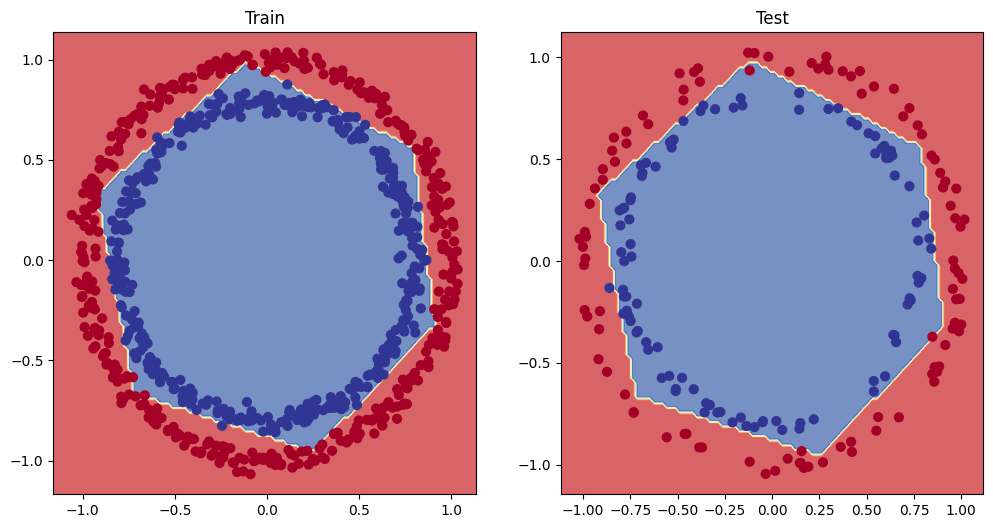

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show();

# Classification Evaluation Metrics

| **Metric name / Evaluation method** | **Definition** | **Code** |
|-------------------------------------|----------------|----------|
| **Accuracy** | Out of 100 predictions, how many does your model get correct? <br> E.g. 95% accuracy means it gets 95/100 predictions correct. | `sklearn.metrics.accuracy_score()` <br> `tf.keras.metrics.Accuracy()` |
| **Precision** | Proportion of true positives over total number of predicted positives. <br> Higher precision → fewer false positives (model predicts 1 when it should've been 0). | `sklearn.metrics.precision_score()` <br> `tf.keras.metrics.Precision()` |
| **Recall** | Proportion of true positives over total number of actual positives (true positives + false negatives). <br> Higher recall → fewer false negatives (model predicts 0 when it should've been 1). | `sklearn.metrics.recall_score()` <br> `tf.keras.metrics.Recall()` |
| **F1-score** | Harmonic mean of precision and recall. <br> Best = 1, Worst = 0. | `sklearn.metrics.f1_score()` |
| **Confusion matrix** | Compares predicted vs. true values in a tabular form. <br> If 100% correct → all values fall on diagonal (top-left → bottom-right). | `sklearn.metrics.confusion_matrix()` <br> `sklearn.metrics.ConfusionMatrixDisplay()` |
| **Classification report** | Collection of main classification metrics (precision, recall, f1-score, support). | `sklearn.metrics.classification_report()` |


# Classification Metrics – Ne Zaman Hangisi?

- **Accuracy (Doğruluk)**  
  Dengeli veri setlerinde kullanılır.  
  Örn: Kedi vs köpek sınıflandırma.  

- **Precision (Kesinlik)**  
  Yanlış pozitifler kritikse önemlidir.  
  Örn: Spam filtresi, sahte haber tespiti.  

- **Recall (Duyarlılık)**  
  Yanlış negatifler kritikse önemlidir.  
  Örn: Kanser tespiti, güvenlik taramaları.  

- **F1-score**  
  Precision + Recall dengesini sağlar. Özellikle dengesiz veri setlerinde tercih edilir.  
  Örn: Fraud (kredi kartı dolandırıcılığı) tespiti.  


## More classification evaluation methods

In [ ]:
#Check the accuracy of our model
loss,accuracy = model_10.evaluate(X_test,y_test)
print(f"model loss on the test set : {loss}")
print(f"Model accuracy on the test set : {(accuracy*100):.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9882 - loss: 0.0505 
model loss on the test set : 0.05505582317709923
Model accuracy on the test set : 98.50


In [ ]:
#How about a confusion matrix
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)

confusion_matrix(y_test,y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test[:10],y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[9.8822510e-01],
        [9.8822510e-01],
        [9.5362222e-01],
        [9.8822510e-01],
        [4.3520689e-04],
        [8.2595058e-04],
        [9.4907546e-01],
        [5.9951697e-05],
        [9.8822510e-01],
        [1.8546603e-03]], dtype=float32))

In [ ]:
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 1, 98]])

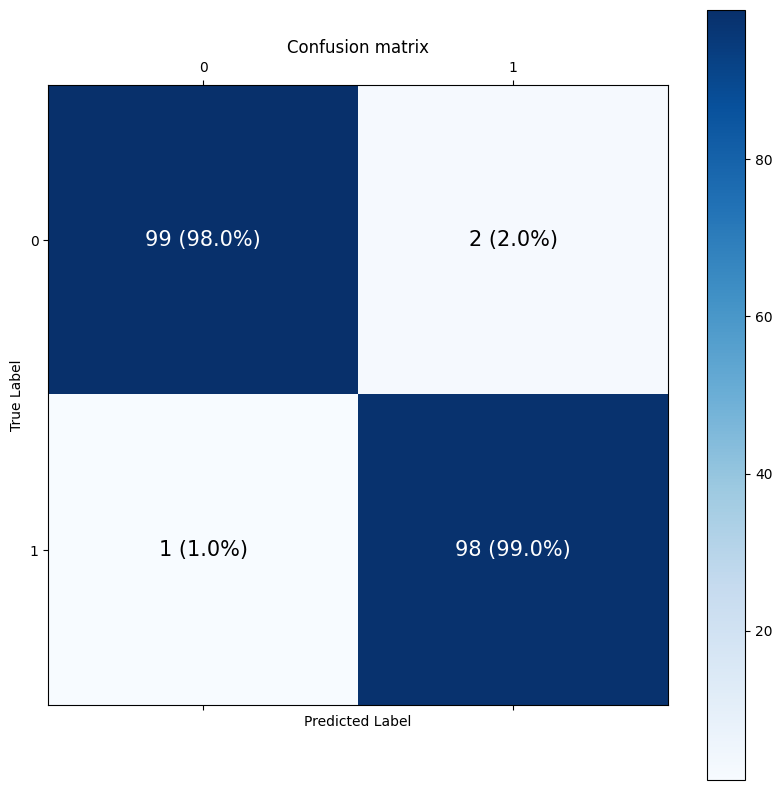

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize confusion matrix (her satiri kendi toplamina bolerek oran cikarir)
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)  # heatmap cizer ve renk yogunlugu = tahmin sayisi
fig.colorbar(cax)

# Create class labels
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(
    title="Confusion matrix",
    xlabel="Predicted Label",
    ylabel="True Label",
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)

# Set Threshold (to decide white/black text color)
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            ha="center", va="center",
            color="white" if cm[i, j] > threshold else "black",
            fontsize=15)


In [ ]:
cm_norm,cm.shape[0]

(array([[0.98019802, 0.01980198],
        [0.01010101, 0.98989899]]),
 2)

## Multiclass classification
* this means if you have 3 different classes its multi class classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"Training sample: \n {train_data[0]}")
print(f"Training label: \n {train_labels[0]}")

Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [ ]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

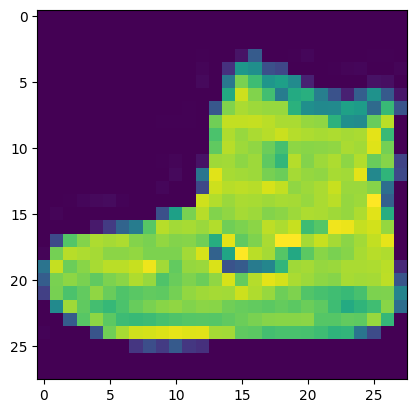

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

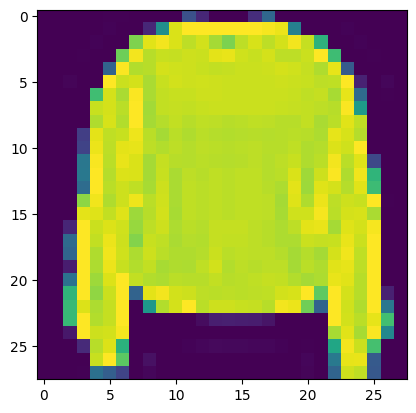

In [ ]:
plt.imshow(train_data[7]);

In [ ]:
#Check out samples label
train_labels[7]

np.uint8(2)

In [ ]:
#Create a small list so we can index onto our training labels
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

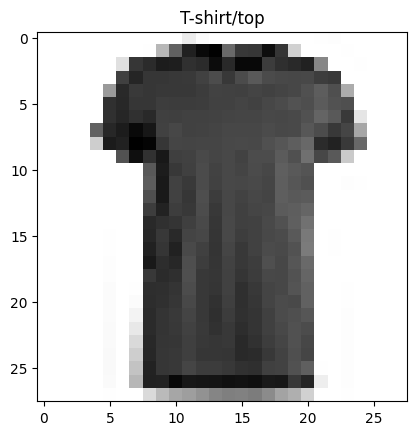

In [ ]:
index_of_choice=17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

Text(0.5, 1.0, 'Bag')

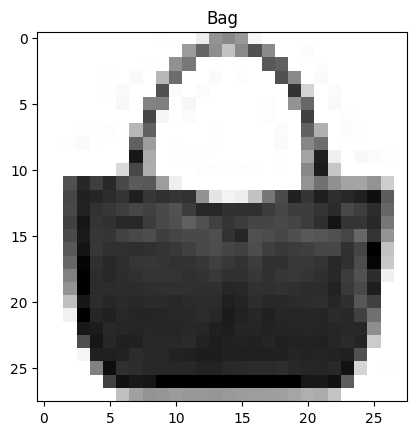

In [ ]:
index_of_choice=100
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

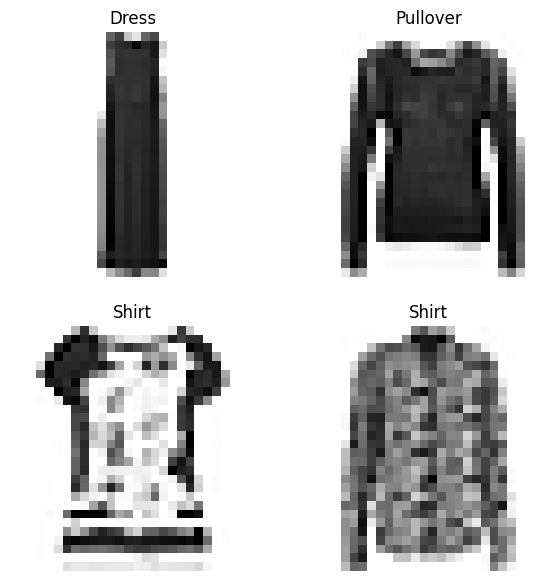

In [ ]:
#Plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(7,7)) #7x7 inch
for i in range(4):
  ax = plt.subplot(2,2,i+1) #2 satir 2 sutun
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary) #imshow goruntuyu cizer gri tonlama renk haritasi(siyah-beyaz)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False) #grafikteki eksen czigileri ve sayilari kapatiyor

## Building a multi class classification model

* Input shape 28x28(the shape of one image)
* Output shape 10
* If your labels are one hot encoded use CategoricalCrossentropy
If your labels are integer form use SparseCategoricalCrossentropy

In [ ]:
len(class_names)

10

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #Flatten = çok boyutlu bir matrisi tek boyutlu bir vektöre çevirir.
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
]) #multi-class classification = softmax binary = sigmoid

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#Fit the model
non_norm_history = model_11.fit(train_data,train_labels
                                ,epochs=10,validation_data=(test_data,test_labels))
#loss = egitim verisi uzerindkei kayip
#accuracy egitim verisi uzerindeki dogruluk
#val_accuracy = test verisi uzerindeki dogruluk
#val_loss = test verisi uzeridneki kayip

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1708 - loss: 2.6223 - val_accuracy: 0.2025 - val_loss: 2.0165
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2128 - loss: 1.9861 - val_accuracy: 0.2246 - val_loss: 1.9461
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2574 - loss: 1.8585 - val_accuracy: 0.2891 - val_loss: 1.7371
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3240 - loss: 1.6501 - val_accuracy: 0.3724 - val_loss: 1.4695
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.3952 - loss: 1.4266 - val_accuracy: 0.4768 - val_loss: 1.3105
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5126 - loss: 1.2334 - val_accuracy: 0.5484 - val_loss: 1.1333
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5585 - loss: 1.1253 - val_accuracy: 0.5566 - val_loss: 1.1262
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5710 - loss: 1.0873 - val_accu

In [ ]:
#CHECK the model sumamry
model_11.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
#Check the min and max values of the training data
train_data.min(),train_data.max()

(np.uint8(0), np.uint8(255))

Neural networks prefer data to be scaled or normalized,this means to have numbers in tensors they try to find patterns between 0 and 1

In [ ]:
#We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

#check the min and max values of the scaled training data
train_data_norm.min(),train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4809 - loss: 1.3432 - val_accuracy: 0.7549 - val_loss: 0.6943
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7620 - loss: 0.6624 - val_accuracy: 0.7763 - val_loss: 0.6208
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7832 - loss: 0.6026 - val_accuracy: 0.7884 - val_loss: 0.5911
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7941 - loss: 0.5758 - val_accuracy: 0.7957 - val_loss: 0.5730
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8022 - loss: 0.5583 - val_accuracy: 0.8018 - val_loss: 0.5594
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8076 - loss: 0.5450 - val_accuracy: 0.8045 - val_loss: 0.5520
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8116 - loss: 0.5362 - val_accuracy: 0.8073 - val_loss: 0.5461
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8138 - loss: 0.5295 -

<Axes: title={'center': 'normalized data'}>

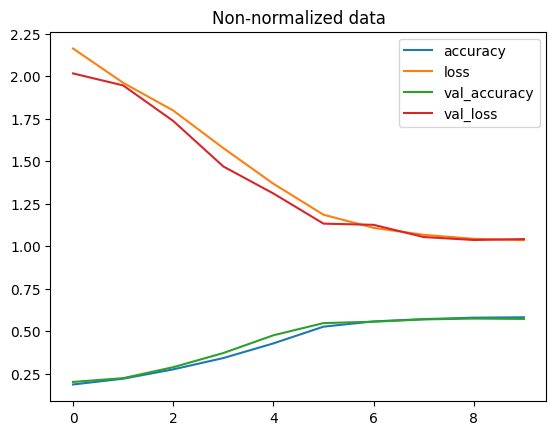

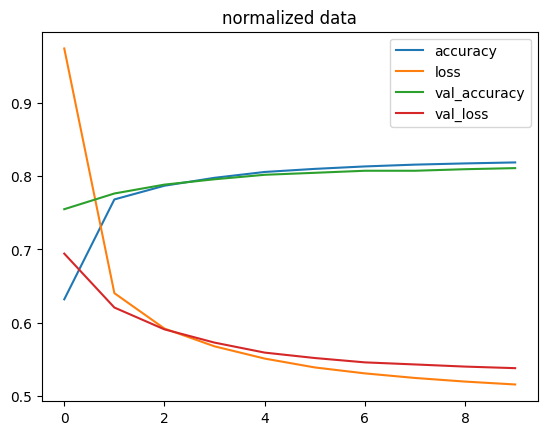

In [ ]:
import pandas as pd
#plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
#plot normalized
pd.DataFrame(norm_history.history).plot(title="normalized data")

## Steps in modelling with TensorFlow
1 - Get Data Ready(turn into tensors)
  * turn all data into numbers
  * make sure all of your tensors are the right shape
  * scale features (normalize or standardize)

In [ ]:
#Finding the ideal learning rate
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
    ])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10 **(epoch/20))

#Fit the model
find_lr_history = model_13.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3205 - loss: 1.7835 - val_accuracy: 0.5289 - val_loss: 1.3123 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5193 - loss: 1.2625 - val_accuracy: 0.5687 - val_loss: 1.1699 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5602 - loss: 1.1474 - val_accuracy: 0.5892 - val_loss: 1.1040 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5855 - loss: 1.0863 - val_accuracy: 0.6051 - val_loss: 1.0541 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6021 - loss: 1.0409 - val_accuracy: 0.6170 - val_loss: 1.0145 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6090 - loss: 1.0034 - val_accuracy: 0.6219 - val_loss: 0.9793 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6214 - 

Text(0.5, 1.0, 'Finding the ideal learning rate')

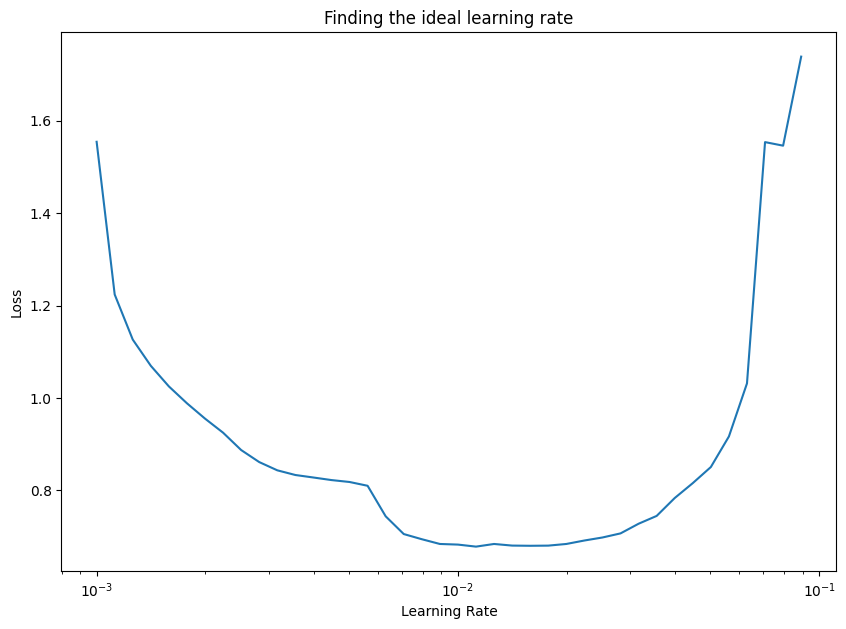

In [ ]:
#Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (np.arange(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
#Lets refit a model with the ideal learning rate

tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(0.005),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data_norm,train_labels,epochs=20,validation_data=(test_data_norm,test_labels))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2354 - loss: 1.8844 - val_accuracy: 0.3575 - val_loss: 1.4953
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3531 - loss: 1.4638 - val_accuracy: 0.3682 - val_loss: 1.4010
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3777 - loss: 1.3976 - val_accuracy: 0.3842 - val_loss: 1.3890
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4024 - loss: 1.3645 - val_accuracy: 0.4053 - val_loss: 1.3545
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4210 - loss: 1.3372 - val_accuracy: 0.4160 - val_loss: 1.3303
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4302 - loss: 1.3225 - val_accuracy: 0.4233 - val_loss: 1.3285
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4372 - loss: 1.3122 - val_accuracy: 0.4232 - val_loss: 1.3257
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4443 - loss: 1.3034 - 

In [ ]:
#Evaluating our multi-class classification model

#1-confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize confusion matrix (her satiri kendi toplamina bolerek oran cikarir)
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)  # heatmap cizer ve renk yogunlugu = tahmin sayisi
  fig.colorbar(cax)



  if classes:
      labels = classes
  else:
      labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(
      title="Confusion matrix",
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels
  )

  #Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #ADJUST LABEL SIZE
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set Threshold (to decide white/black text color)
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      ax.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
              ha="center", va="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Make some predictions with our model
y_probs = model_14.predict(test_data_norm)# probs is short for prediction prob.

#View the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[6.02687578e-06, 2.76247924e-03, 1.32418336e-07, 7.37656592e-05,
        1.03145801e-07, 2.33716488e-01, 8.66283699e-07, 6.86039567e-01,
        4.10769026e-05, 7.73594454e-02],
       [2.42723450e-02, 2.57165789e-10, 4.45209950e-01, 8.05308082e-05,
        4.11772728e-01, 5.58515062e-28, 1.18241020e-01, 0.00000000e+00,
        4.23306890e-04, 0.00000000e+00],
       [3.92533541e-02, 5.87042987e-01, 2.20815954e-03, 1.52460337e-01,
        1.76180666e-03, 9.08332989e-02, 9.23159905e-03, 1.02324516e-03,
        1.16185233e-01, 5.26500621e-10],
       [2.53140423e-02, 5.74682236e-01, 1.26976136e-03, 1.13092326e-01,
        1.01013249e-03, 1.91817641e-01, 5.60639938e-03, 4.25846642e-03,
        8.29489678e-02, 9.81734072e-09],
       [3.03600848e-01, 2.77516805e-03, 1.30390882e-01, 9.85835642e-02,
        1.09575227e-01, 5.16863774e-10, 2.07030699e-01, 3.48005571e-17,
        1.48043618e-01, 5.07767929e-35]], dtype=float32)

In [ ]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([6.0268758e-06, 2.7624792e-03, 1.3241834e-07, 7.3765659e-05,
        1.0314580e-07, 2.3371649e-01, 8.6628370e-07, 6.8603957e-01,
        4.1076903e-05, 7.7359445e-02], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Sneaker')

In [ ]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([7, 2, 1, 1, 0, 1, 0, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[606,  55, 114,  34,   0,   4,  76,   0, 111,   0],
       [ 29, 881,   1,  21,   0,  33,   2,   3,  30,   0],
       [258,  11, 635,   7,   0,   1,  65,   0,  23,   0],
       [308, 268,  26, 157,   0,  10,   7,   1, 223,   0],
       [220,   4, 701,  11,   0,   0,  45,   0,  19,   0],
       [  0,  49,   0,   0,   0, 753,   0, 158,   0,  40],
       [421,  27, 386,  30,   0,   3,  63,   0,  70,   0],
       [  0,   0,   0,   0,   0, 184,   0, 720,   0,  96],
       [458, 176,  27, 107,   0,   7,  19,   1, 202,   3],
       [  1,   1,   0,   0,   0,  12,   0,  98,   0, 888]])

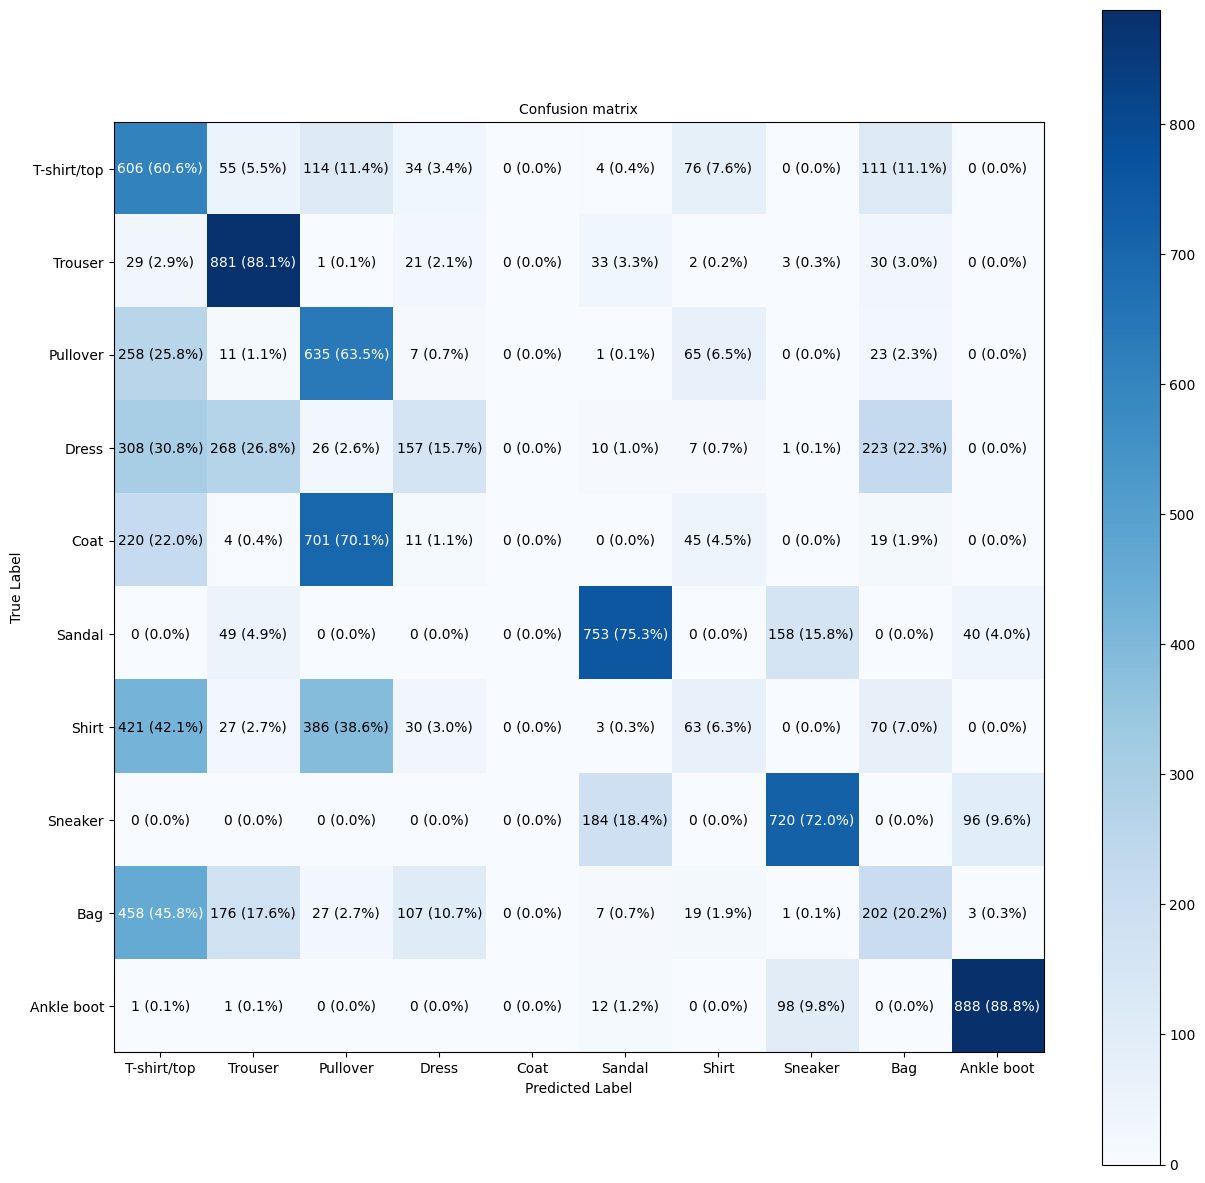

In [ ]:
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_names,figsize=(15,15),text_size=10)

Bu fonksiyon:
Rastgele bir resim seçiyor,
Modelin tahminini yapıyor,
Tahmin & gerçek sınıfı karşılaştırıyor,
Resmi çiziyor ve altına tahmin sonucunu (doğru/yanlış renkte) yazıyor.

In [ ]:
import random
def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random image plots it and labels it with a prediction and truth label.
  """
  i = random.randint(0 ,len(images))

  #Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image,cmap=plt.cm.binary)

  #Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  #Add xlabel info (prediction /true label)
  plt.xlabel("Pred : {} {:2.0f}% (True : {})".format(pred_label,100*tf.reduce_max(pred_probs),true_label),
             color=color) #set the color to green or red based on if prediction is right or wrong


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


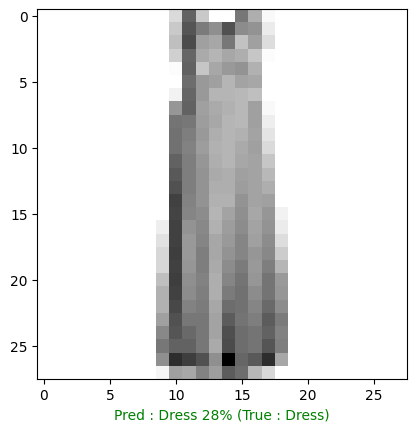

In [ ]:
plot_random_image(model = model_14,images=test_data_norm,true_labels =test_labels,classes=class_names)

## What pattern is our model learning

In [ ]:
#Find the layers of our most recent model
model_14.layers

[<Flatten name=flatten_5, built=True>,
 <Dense name=dense_41, built=True>,
 <Dense name=dense_42, built=True>,
 <Dense name=dense_43, built=True>]

In [ ]:
#Extract a particular layer
model_14.layers[1]

<Dense name=dense_41, built=True>

In [ ]:
#Get the patterns of a layer in our network
weights,biases = model_14.layers[1].get_weights()

#Shapes
weights,weights.shape

(array([[-0.03186418, -0.06146143,  0.05367012, -0.3921979 ],
        [-0.0511081 ,  0.0714988 ,  0.06978945, -0.96708673],
        [ 0.07955416,  0.00924432, -0.04563786,  4.1300516 ],
        ...,
        [ 0.01020341, -0.0591755 , -0.06808686, -0.68273884],
        [ 0.08504638,  0.01264039, -0.01753601, -0.02940912],
        [-0.02269291, -0.05826275,  0.06447467,  0.7599825 ]],
       dtype=float32),
 (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
#Biases and bias shapes
biases,biases.shape

(array([-0.03129094, -0.03861962, -0.03002545,  9.282433  ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a Tensorflow Dense layer)

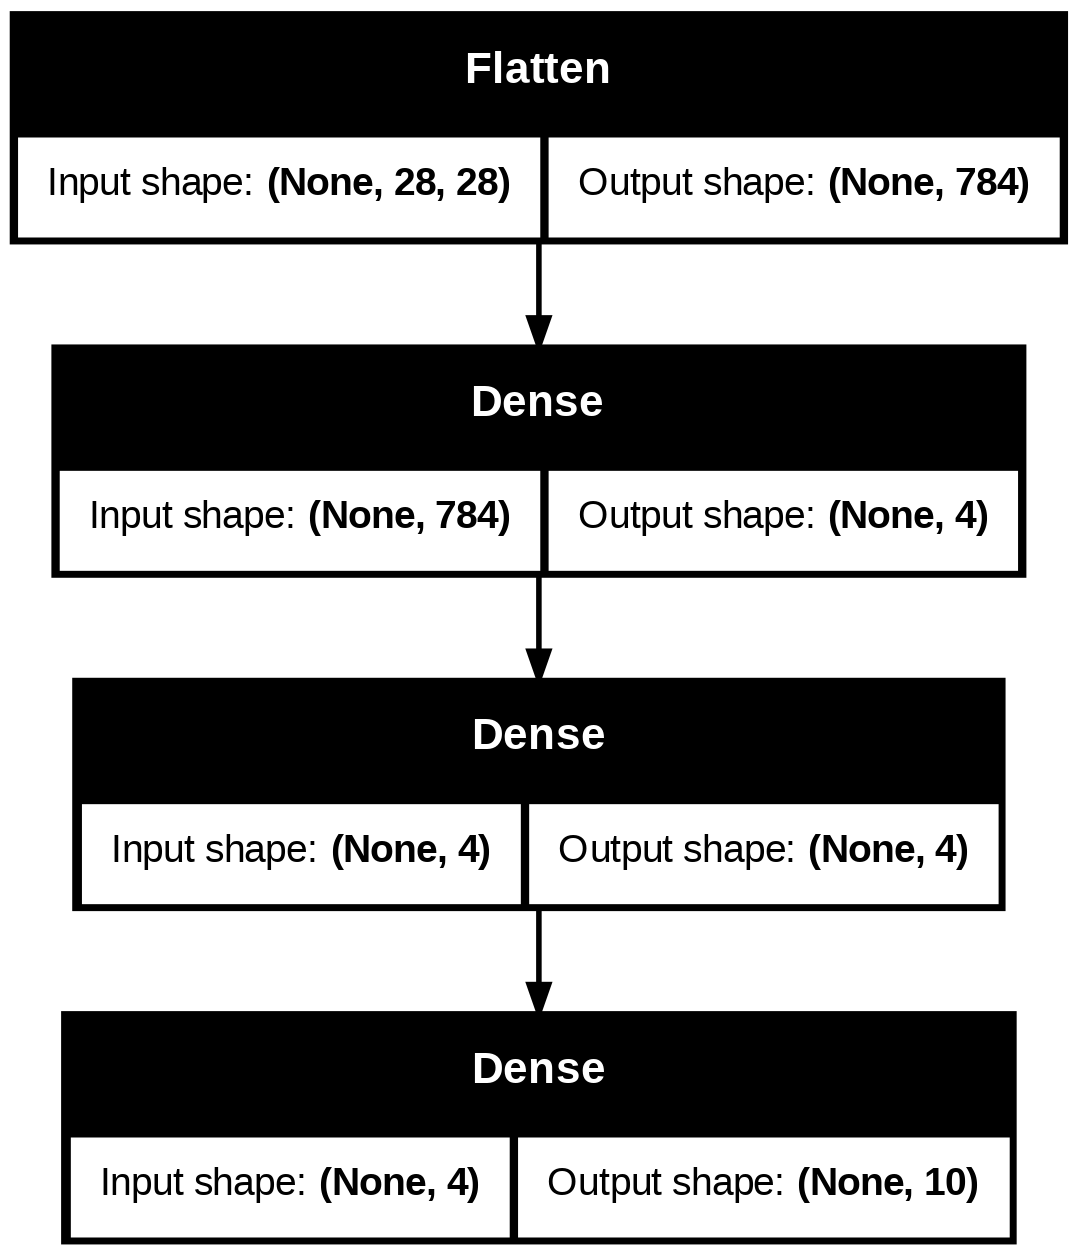

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_14,show_shapes=True)

In [ ]:
tf.random.set_seed(42)

#exmple
model_exp = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

model_exp.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(0.001),
                  metrics=["accuracy"])

history_exp = model_exp.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

SyntaxError: expected argument value expression (ipython-input-3159317244.py, line 10)

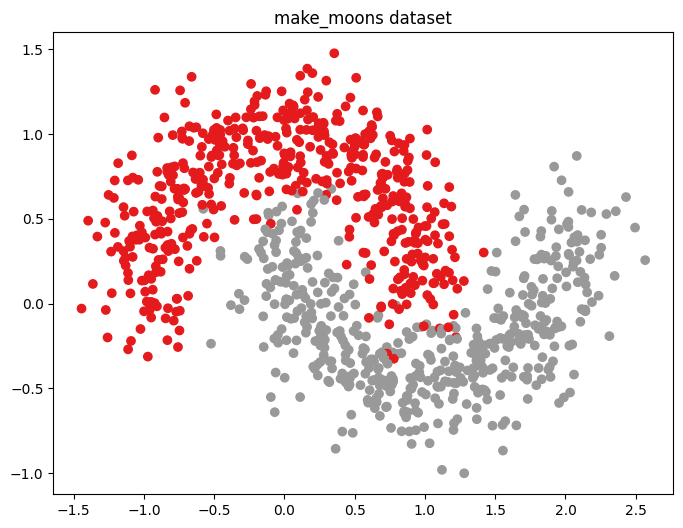

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8138 - loss: 0.5395 - val_accuracy: 0.8400 - val_loss: 0.3138
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8609 - loss: 0.3196 - val_accuracy: 0.8700 - val_loss: 0.2690
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8634 - loss: 0.2875 - val_accuracy: 0.9000 - val_loss: 0.2474
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8673 - loss: 0.2700 - val_accuracy: 0.9050 - val_loss: 0.2196
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8860 - loss: 0.2395 - val_accuracy: 0.9250 - val_loss: 0.1861
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9089 - loss: 0.2046 - val_accuracy: 0.9450 - val_loss: 0.1506
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9395 - loss: 0.1684 - val_accuracy: 0.9650 - val_loss: 0.1180
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9486 - loss: 0.1379 - val_accuracy: 0.9750 - val_los

In [ ]:
#Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import tensorflow as tf

# 1. Veri setini oluştur
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42) #noise 0.2 veriyi biraz zorlastirir ogrenmeyi noktalari etrafa dagitir

# 2. Görselleştir
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1)
plt.title("make_moons dataset")
plt.show()

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Model oluştur
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 5. Compile et
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

# 6. Eğit
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

# 7. Sonuçları değerlendir
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7753 - loss: 0.6345 - val_accuracy: 0.8452 - val_loss: 0.4154
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8626 - loss: 0.3746 - val_accuracy: 0.8578 - val_loss: 0.3836
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8776 - loss: 0.3330 - val_accuracy: 0.8565 - val_loss: 0.3894
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8847 - loss: 0.3075 - val_accuracy: 0.8644 - val_loss: 0.3742
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8926 - loss: 0.2881 - val_accuracy: 0.8670 - val_loss: 0.3684
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8975 - loss: 0.2735 - val_accuracy: 0.8656 - val_loss: 0.3655
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9021 - loss: 0.2590 - val_accuracy: 0.8677 - val_loss: 0.3642
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9075 - loss: 0.2473 

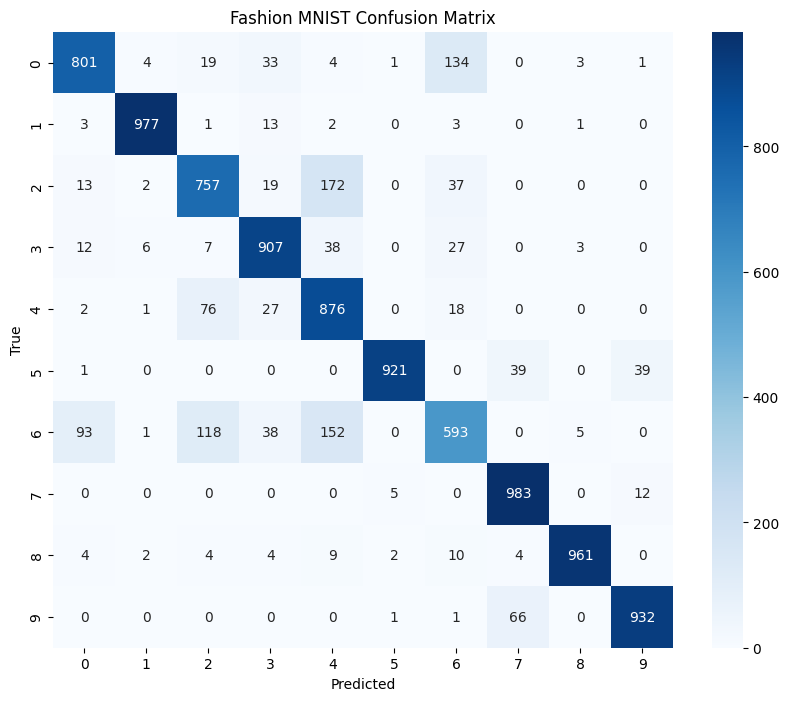

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Veri seti yükle
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# 2. Normalizasyon
train_data = train_data / 255.0
test_data = test_data / 255.0

# 3. Model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")  # 10 class
])

# 4. Compile
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)

# 5. Fit
history = model.fit(train_data, train_labels, epochs=10,
                    validation_data=(test_data, test_labels))

# 6. Confusion matrix
import numpy as np
y_pred = model.predict(test_data).argmax(axis=1)

cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Fashion MNIST Confusion Matrix")
plt.show()


In [1]:
#Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
import numpy as np

def softmax(x):
    """
    Softmax aktivasyon fonksiyonunu hesaplar.

    Bu fonksiyon, sayısal kararlılığı artırmak için maksimum değer çıkarma
    yöntemini kullanır. Bu, çok büyük sayılarla çalışırken "overflow"
    hatalarını engeller.

    Args:
        x (np.ndarray): Girdi tensörü (veya NumPy dizisi).
                        Shape'i (n_samples, n_features) olabilir.
                        Örneğin, bir sinir ağı katmanının çıktıları (logit'ler).

    Returns:
        np.ndarray: Girdi tensörüne softmax uygulanmış hali.
                    Her bir satırdaki değerlerin toplamı 1'e eşit olur ve
                    bu değerler bir olasılık dağılımını temsil eder.
    """
    # 1. Sayısal Kararlılık (Numerical Stability) İçin Maksimum Değeri Çıkarma
    # Her bir satırdaki (örnekteki) en büyük değeri bulup o satırdaki tüm
    # elemanlardan çıkarıyoruz. Bu işlem, üs alma (np.exp) sırasında çok
    # büyük sayıların oluşmasını ve "overflow" hatası vermesini engeller.
    # Sonucu değiştirmez ama hesaplamayı kararlı hale getirir.
    # axis=1: işlemi her satır için ayrı ayrı yapar.
    # keepdims=True: sonuç dizisinin boyutunu orijinaliyle aynı tutar,
    # bu da sonraki bölme işlemi için (broadcasting) gereklidir.
    x_stable = x - np.max(x, axis=1, keepdims=True)

    # 2. Üstel Değerleri (Exponentials) Hesaplama
    # Kararlı hale getirilmiş logit'lerin e tabanındaki üstelini alırız.
    exps = np.exp(x_stable)

    # 3. Olasılıkları Hesaplama
    # Her bir elemanı, bulunduğu satırdaki tüm üstel değerlerin toplamına böleriz.
    # Bu sayede her bir satırın toplamı 1 olur ve bir olasılık dağılımı elde ederiz.
    probabilities = exps / np.sum(exps, axis=1, keepdims=True)

    return probabilities

# --- Örnek Kullanım ---

# Genellikle bir modelin çıktısı bu şekilde olur:
# 2 örnek (satır) ve her biri için 4 sınıf skoru (sütun).
# Bu skorlara "logit" denir.
logits = np.array([
    [1.0, 2.0, 3.0, 4.0],  # 1. örnek için skorlar
    [1.0, 1.5, 0.5, 2.5]   # 2. örnek için skorlar
])

# Softmax fonksiyonunu çağıralım
softmax_output = softmax(logits)

print("Orijinal Logit'ler (Girdi Tensörü):\n", logits)
print("\nSoftmax Uygulanmış Çıktı (Olasılıklar):\n", softmax_output)

# Her bir satırın toplamının 1'e çok yakın olduğunu doğrulayalım
row_sums = np.sum(softmax_output, axis=1)
print("\nHer Satırın Toplamı (Doğrulama):\n", row_sums)

# Çıktıdan da görüleceği üzere, en yüksek skora sahip olan eleman (ilk satırda 4.0),
# en yüksek olasılığa sahip olur (ilk satırda ~0.665).


Orijinal Logit'ler (Girdi Tensörü):
 [[1.  2.  3.  4. ]
 [1.  1.5 0.5 2.5]]

Softmax Uygulanmış Çıktı (Olasılıklar):
 [[0.0320586  0.08714432 0.23688282 0.64391426]
 [0.12925005 0.2130973  0.07839412 0.57925853]]

Her Satırın Toplamı (Doğrulama):
 [1. 1.]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


--- Fashion MNIST Modeli Eğitiliyor ---
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7819 - loss: 0.6332
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8621 - loss: 0.3817
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8782 - loss: 0.3359
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8844 - loss: 0.3124
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8903 - loss: 0.2974
-------------------------------------------------- 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


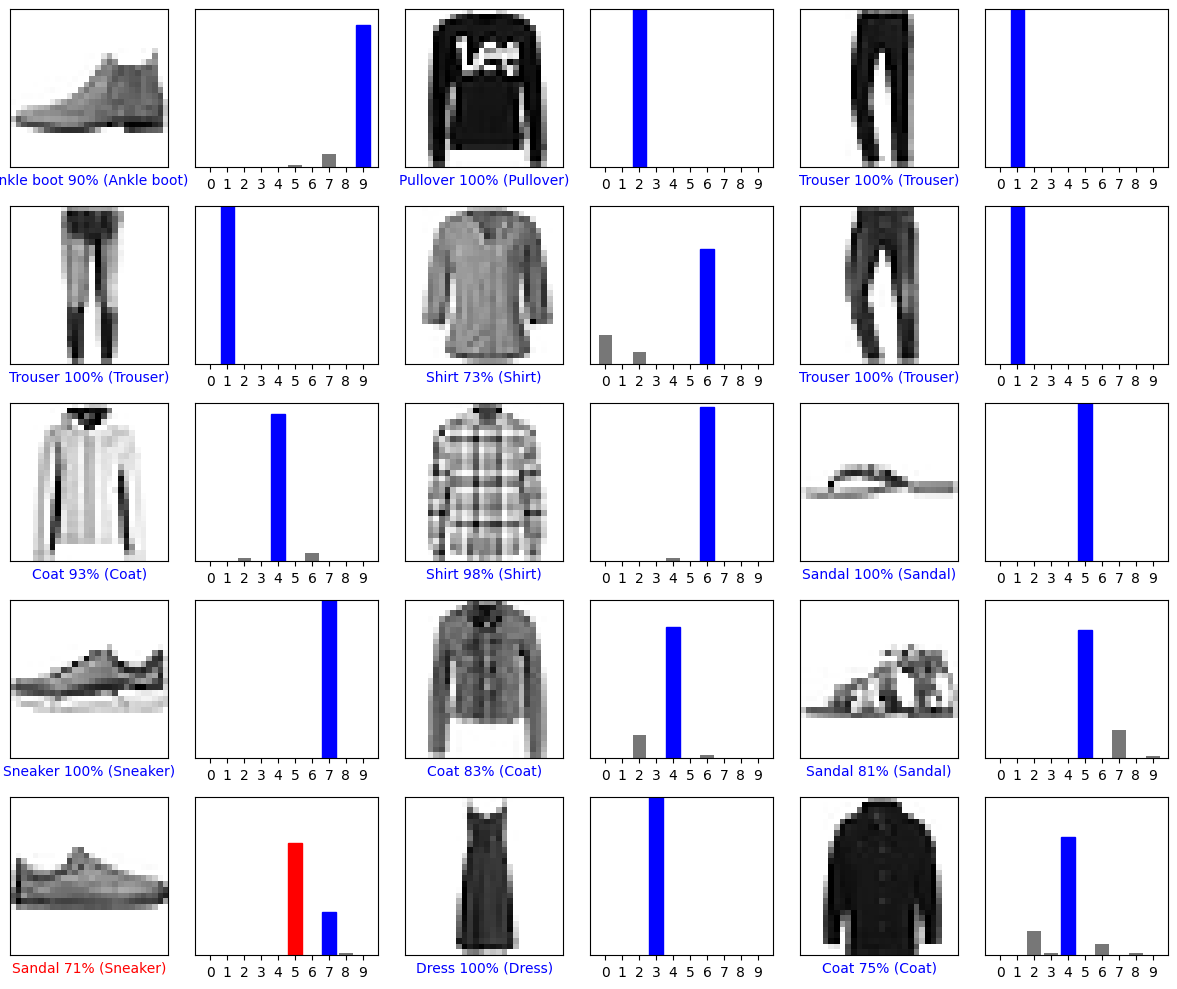

In [2]:
#Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the classification tutorial in the TensorFlow documentation for ideas.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# --- Fashion MNIST ile Görüntü Sınıflandırma ve Görselleştirme ---

# 1. Veri Setini Yükleme
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 5. Modeli Eğitme
print("--- Fashion MNIST Modeli Eğitiliyor ---")
model.fit(train_images, train_labels, epochs=5)
print("-" * 50, "\n")


# Predictions
predictions = model.predict(test_images)

# --- Görselleştirme Fonksiyonları ---

def plot_image(i, predictions_array, true_label, img):
    """
    Belirli bir indeksteki görüntüyü, tahmin etiketini ve gerçek etiketini çizer.
    """
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    """
    Belirli bir indeksteki tahmin olasılıklarının grafiğini çizer.
    """
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# --- Çoklu Tahminleri Görselleştirme ---

# İlk 15 test görüntüsünü, tahminlerini ve gerçek etiketlerini çizelim.
# Doğru tahminler mavi, yanlış tahminler kırmızı renkte gösterilir.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()